# Wavelets

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image
import pywt
import pywt.data

In [3]:
print(pywt.families())

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [4]:
for family in pywt.families():
    print(family,':',pywt.wavelist(family))

haar : ['haar']
db : ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
sym : ['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
coif : ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17']
bior : ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
rbio : ['rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8'

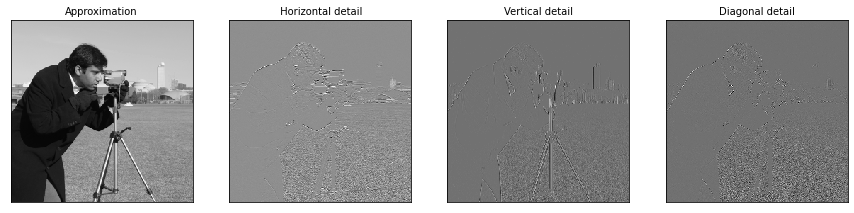

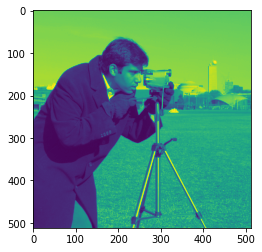

In [5]:
# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'db2') #'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(15, 5))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

# fig.tight_layout()
plt.show()

plt.imshow(original)
plt.show()

(512, 512)
(257, 257)
(514, 514)


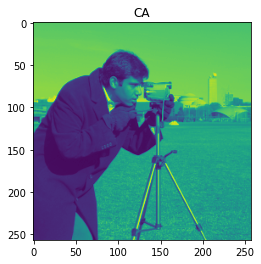

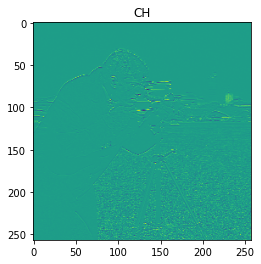

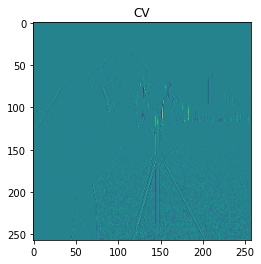

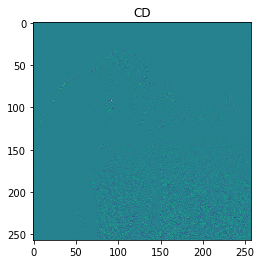

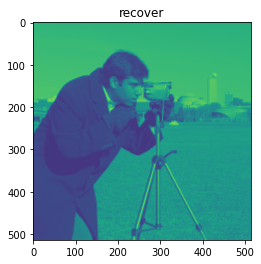

In [6]:
coef = pywt.dwt2(original, 'db2')
cA, (cH, cV, cD) = coef

recover = pywt.idwt2(coef,'db1')

print(original.shape)
print(cA.shape)
print(recover.shape)

plt.imshow(cA)
plt.title('CA')
plt.show()
plt.imshow(cH)
plt.title('CH')
plt.show()
plt.imshow(cV)
plt.title('CV')
plt.show()
plt.imshow(cD)
plt.title('CD')
plt.show()
plt.imshow(recover)
plt.title('recover')
plt.show()

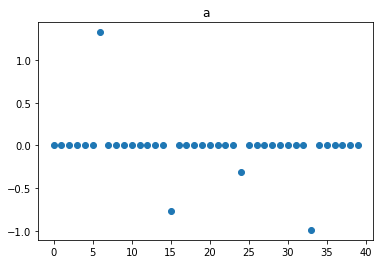

In [7]:
#defining vector a
np.random.seed(24)
a_values = np.random.normal(0, 1, 4)
d = 40
a_real = np.zeros((d,1))
for a_val in range(len(a_values)):
    a_real[6+9*a_val,0] = a_values[a_val]

plt.plot(range(d),a_real[:,0],'o')
plt.title('a')
plt.show()

In [12]:
j = pywt.wavedec([0,1,0,10,0,0,0,0],'db1')
j

# ern = pywt.idwt(a_real,None,wavelet='db1')
# ern[:,1]

[array([3.8890873]),
 array([3.8890873]),
 array([-4.5,  0. ]),
 array([-0.70710678, -7.07106781,  0.        ,  0.        ])]

In [9]:
a_new = np.array([[1, 2, 3, 4, 5, 6]],dtype=float).T
print(a_new)
big_psi = np.empty((6,0),float)
for a_ii in range(a_new.size):
    e = np.zeros((a_new.shape),dtype=float)
    e[a_ii,0] = a_new[a_ii,0]
    phi = pywt.idwt(e,None,wavelet='db1')[:,0:1]
    big_psi = np.append(big_psi,phi,axis=1)
    
print(big_psi)


[[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]]
[[0.70710678 0.         0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.        ]
 [0.         0.         2.12132034 0.         0.         0.        ]
 [0.         0.         0.         2.82842712 0.         0.        ]
 [0.         0.         0.         0.         3.53553391 0.        ]
 [0.         0.         0.         0.         0.         4.24264069]]


In [10]:
a_new = np.array([[1, 2, 3, 4, 5, 6]],dtype=float)
pywt.idwt(a_new.T,None,wavelet='db1')

array([[0.70710678, 0.70710678],
       [1.41421356, 1.41421356],
       [2.12132034, 2.12132034],
       [2.82842712, 2.82842712],
       [3.53553391, 3.53553391],
       [4.24264069, 4.24264069]])

In [11]:
a_new = np.array([[1, 2, 3, 4, 5, 6]],dtype=float).T
big_psi = np.empty((6,0),float)
for a_ii in range(a_new.size):
    big_psi = np.append(big_psi,a_new,axis=1)
    
print(big_psi)
print(a_new.size)

[[1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6.]]
6
